In [1]:
# Sagar Sahu
# IBM Quantum Challenge 2024- Lab 1

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-transpiler-service

import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=407de88d7efda46dafdce18c7fb6412ff229531c741b00a0342553437fbeda1f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 8.2 MB/s eta 0:00:00
  Installing build dependenc

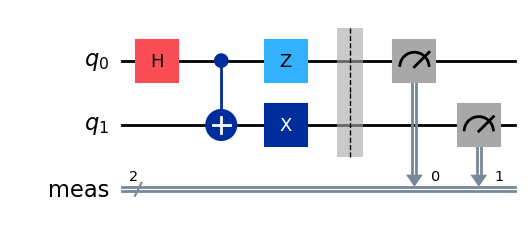

In [2]:
# Build a circuit to form a psi-minus Bell state 
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.z(0)

qc.measure_all()
qc.draw('mpl')

{'01': 133, '10': 123}


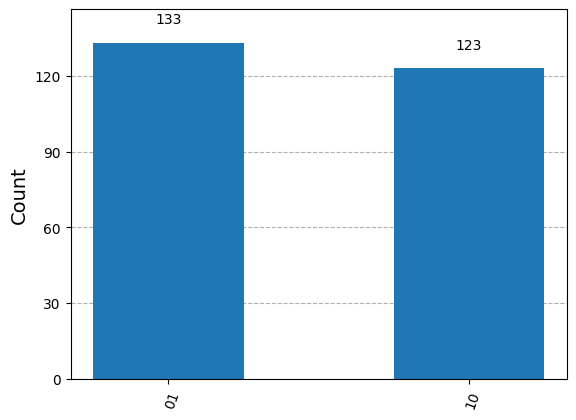

In [3]:
# Uses the Qiskit StatevectorSampler to obtain the counts resulting from our circuit.

qc.measure_all()

# Start a job that will return shots for all 100 parameter value sets.
sampler = StatevectorSampler()
pub = qc
job_sampler = sampler.run([pub], shots=256)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

# Approximately even probability between the 2 qubit states
plot_histogram(counts_sampler)

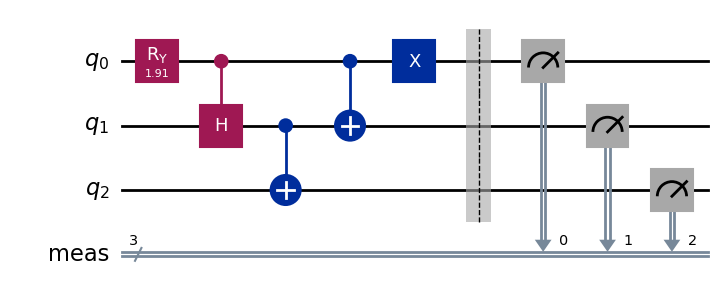

In [4]:
# Building W-state circuit, which uses 3 qubits instead of 2:

# 1. Initialize our 3 qubit circuit
# 2. Perform an Ry rotation on our qubit. The specifics of this operation are provided.
# 3. Perform a controlled hadamard gate on qubit 1, with control qubit 0
# 4. Add a CNOT gate with control qubit 1 and target qubit 2
# 5. Add a CNOT gate with control qubit 0 and target qubit 1
# 6. Add a X gate on qubit 0

qc = QuantumCircuit(3)
qc.ry(1.91063324, 0)
qc.ch(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)
qc.measure_all()
qc.draw('mpl')

{'100': 3283, '001': 3337, '010': 3380}


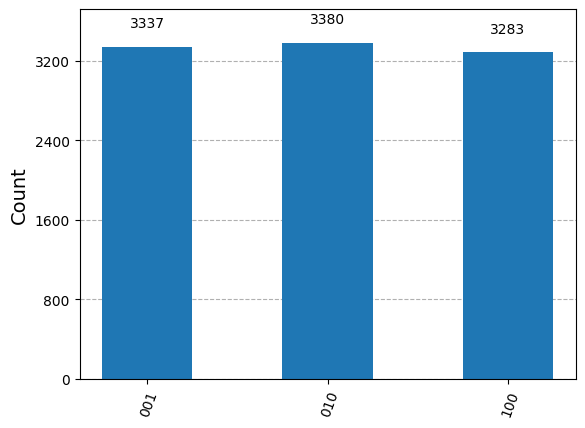

In [5]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)

In [6]:
# Pauli operator: matrix representing a quantum mechanical observable corresponding to a spin
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


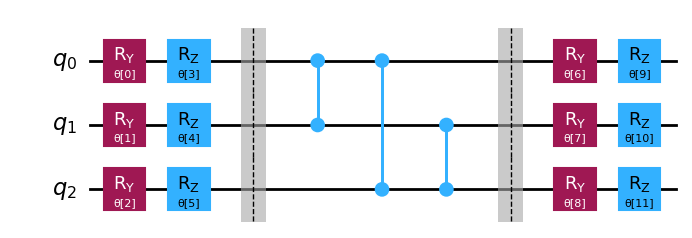

In [7]:
# Executing a VQE algorithm requires these 3 steps:
# 1. Setting up the Hamiltonian and ansatz (using TwoLocal)
# 2. Implementing the Qiskit Runtime estimator
# 3. Adding the Classical optimizer and running our program

ansatz = TwoLocal(3, ['ry', 'rz'], 'cz', 'full', reps=1, insert_barriers=True)
ansatz.decompose().draw('mpl')

In [8]:
backend_answer = FakeSherbrooke()
optimization_level_answer = 3
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = pm.run(ansatz)

backend_converter.convert_to_target:INFO:2024-07-07 18:53:34,329: Gate calibration for instruction measure on qubits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126) is found in the PulseDefaults payload. However, this entry is not defined in the gate mapping of Target. This calibration is ignored.
backend_converter.convert_to_target:INFO:2024-07-07 18:53:34,332: Gate calibration for instruction u1 on qubits (0,) is found in the PulseDefaults payload. However, this entry is not defined in the gate mapping of Target. T

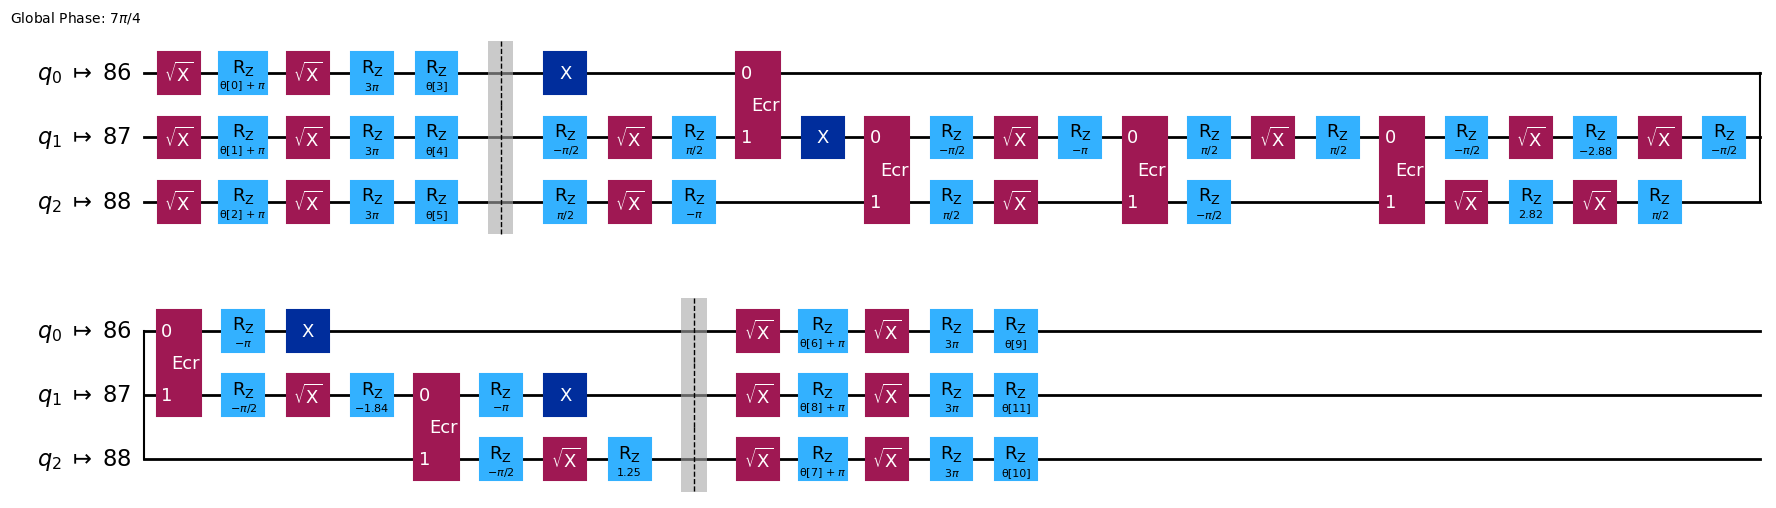

In [9]:
isa_circuit.draw('mpl', idle_wires=False,)

In [10]:
# Define our Hamiltonian
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """
    pub = (ansatz)
    result = estimator.run([(pub, hamiltonian, [params])]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

x0 = 2 * np.pi * np.random.random(ansatz.num_parameters)
x0

array([5.66042335, 2.35904567, 6.05372543, 0.50680707, 2.31957649,
       1.23621383, 2.67460689, 0.68931413, 0.41815721, 3.83027802,
       2.08271887, 2.46866182])